# Cvičení: Clustering
Zdroj: [Jiří Pešík. *Python pro data science.*](https://github.com/pesikj/PythonProDataScience)
(upraveno)

## Vzorky vína

Pracuj se souborem [wine-regions.csv](data/wine-regions.csv). Každý záznam obsahuje informace o vzorku vína. Všechny vzorky pocházejí z jednoho regionu v Itálii, ale v datech se nachází několik různých odrůd. Naší úlohou bude data uspořádat do shluků, které by mohly odpovídat odrůdám.

- Projdi kroky připravené níže a přesvědč se, že každému z nich v rámci možností rozumíš. Podle grafu odhadni vhodný počet shluků (pro urychlení vynecháme vhodnější odhad pomocí metriky *inertia*) a ten použij pro natrénování modelu K-means.

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [12]:
# Načtení dat
X = pd.read_csv("wine-regions.csv")
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
# Normalizace dat
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Zobrazení výsledku normalizace
# (provizorně převedeme na DataFrame pro přehlednější zobrazení)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [14]:
# Redukce dimenzí na dvě
# (Původní data mají 13 sloupců, tzn. 13 dimenzí)

# Příprava metody TSNE
# (TSNE: T-distributed Stochastic Neighbor Embedding)
tsne = TSNE(n_components=2, random_state=42)

# Aplikace připraveného TSNE modelu na data
X = tsne.fit_transform(X)

# Zobrazení výsledku redukce dimenzionality
# (provizorně převedeme na DataFrame pro přehlednější zobrazení)
pd.DataFrame(X).head()

,0,1
0,10.311771,-8.546624
1,8.054532,-5.551340
2,12.126210,-3.887138
3,12.968869,-6.844522
4,9.538611,-0.349233


Text(0.5, 1.0, 'Plotted data, reduced to 2 dimensions')

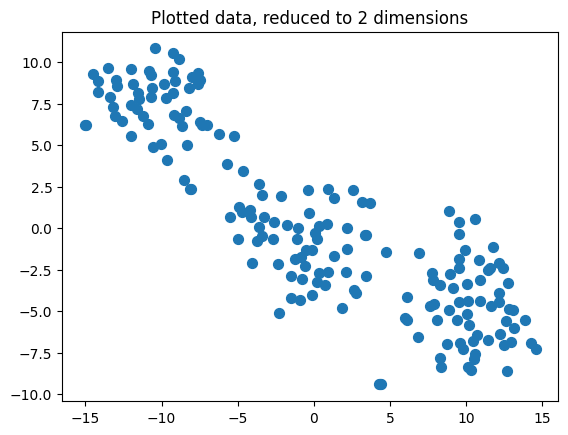

In [15]:
# Zobrazení upravených dat
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Plotted data, reduced to 2 dimensions")

In [ ]:
# VLASTNÍ ŘEŠENÍ: Zde doplň své dva řádky kódu pro inicializaci modelu 
# a pro predikci příslušnosti do jednoho z clusterů.
# Výsledek predikce ulož to proměnné "labels".


In [ ]:
# Vykreslení bodů (barva podle příslušnosti ke clusteru)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="Accent")
# ... parametr s nastavuje velikost bodu
# ... parametr cmap nastavuje "colormap" - výběr barviček zde: https://matplotlib.org/stable/tutorials/colors/colormaps.html

# Vykreslení centroidů každého clusteru
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker="P", s=200, alpha=0.5)
# ... parametr alpha nastavuje průhlednost
# ... parametr marker nastavuje tvar značky
plt.title("Clustered data")